In [1]:
import numpy as np      
import scipy as sc                 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

(500, 1)


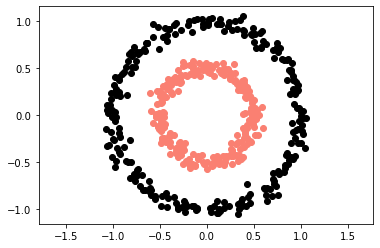

In [2]:
n = 500
p = 2
X, Y =make_circles(n_samples=n, factor=.5, noise=.05)
Y = Y[:, np.newaxis]
print(Y.shape)

plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1], c="black")
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1], c="salmon")
plt.axis("equal")
plt.show()

In [3]:
class neural_layer():
    
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur)     * 2 - 1
        self.w = np.random.rand(n_conn, n_neur) * 2 - 1

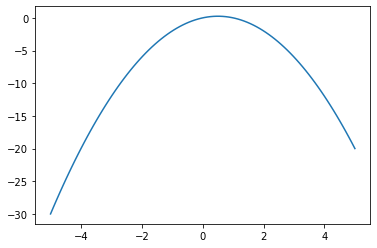

In [4]:
# Funciones de Activación 
sigm  = (lambda x: 1 / (1 + np.exp(-x)),
         lambda x: x*(1-x))

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[1](_x))

In [5]:
def create_nn(topology, act_f):
    
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
    return nn

In [6]:
topology = [2, 8, 1]
neural_net = create_nn(topology, sigm)
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))
 
def train(neural_net, X, Y, l2_cost, lr=0.5, train = True):
    out = [(None, X)]
    
    # Forward pass
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].w + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        out.append((z, a))
    
    if train:
        # Backward pass
        deltas = []
        
        for l in reversed(range(0, len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]
            
            if l == len(neural_net) - 1:
                # Calcular delta última capa.
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
                
            else:
                # Calcular delta respecto a capa previa.
                deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))
                
            _w = neural_net[l].w
            # Gradiant descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis =0, keepdims = True) * lr
            neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr

    
    return out[-1][1]
    
train(neural_net, X, Y, l2_cost, 0.5)

array([[0.12882038],
       [0.08461727],
       [0.11227057],
       [0.11584666],
       [0.11817964],
       [0.09669513],
       [0.12159547],
       [0.1200698 ],
       [0.09747725],
       [0.08118566],
       [0.12805097],
       [0.12342449],
       [0.10355804],
       [0.13264937],
       [0.12289483],
       [0.11570614],
       [0.12171275],
       [0.1048742 ],
       [0.09595763],
       [0.11209157],
       [0.11811937],
       [0.11380353],
       [0.12284795],
       [0.09875052],
       [0.097518  ],
       [0.12567674],
       [0.10101322],
       [0.12896396],
       [0.11203914],
       [0.12663949],
       [0.12536157],
       [0.1231083 ],
       [0.12684144],
       [0.13441891],
       [0.11370719],
       [0.12003867],
       [0.12794214],
       [0.10357125],
       [0.10955696],
       [0.11696549],
       [0.12060713],
       [0.12196931],
       [0.09597097],
       [0.12418481],
       [0.0875655 ],
       [0.12721226],
       [0.13336849],
       [0.137

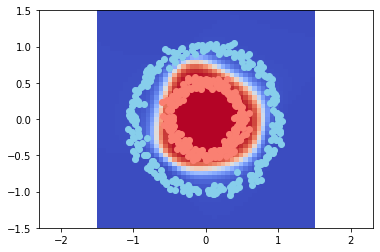

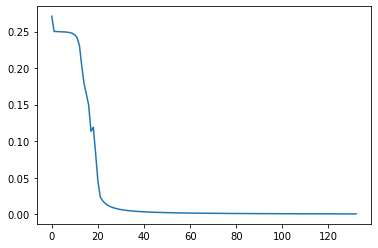

KeyboardInterrupt: 

In [7]:
import time
topology = [2, 8, 4, 1]

from IPython.display import clear_output
neural_n = create_nn(topology, sigm)
loss=[]

for i in range(10000):
    pY =  train(neural_n, X, Y, l2_cost, lr = 0.03)
    
    if i % 25 == 0: 
        loss.append(l2_cost[0](pY, Y))
        res = 50
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        _Y = np.zeros((res, res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]  

        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")
        plt.scatter(X[Y[:,0]==0, 0] , X[Y[:,0]==0, 1], c="skyblue")
        plt.scatter(X[Y[:,0]==1, 0] , X[Y[:,0]==1, 1], c="salmon")
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)